In [1]:
import sys
sys.path.append('../../../../../')

#### Local Plotting Tools ####
from plot_tools.fig_preamble import *
from plot_tools.plot_helper_funcs import cm2inch

#### Matplotlib & Numpy ####
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
############ Saving Commands #########

ver=0
datapath = '../../../../DATA_v'+str(ver)+'_/' #v'+str(ver)+'/DATA_v'+str(ver)+'/'
savefig = '../svg/paper_v0_'
figdata = '../svg/fig_data/paper_v0_'
figname='maxfwdpred'

############ Load Data #########
n_predict = 50
num = 2050
n_train = 2000

/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:
/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markeredgecolor != ec:


LSF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 1
(24, 1)
LSF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 2
(24, 2)
LSF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 3
(24, 3)
LSF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 4
(24, 4)
LSF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 7
(24, 7)
0 49
1 30
2 24
3 18
4 5


/home/riddhisw/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1182: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._markeredgecolor != ec:


AKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 1
(24, 1)
AKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 2
(24, 2)
AKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 3
(24, 3)
AKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 4
(24, 4)
AKF: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 7
(24, 7)
0 49
1 26
2 28
3 16
4 6
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 1
(24, 1)
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 2
(24, 2)
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 3
(24, 3)
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 4
(24, 4)
LKFFB: Data Loaded? Yes
I am in RISK DICT and test case and variations are: 24 7
(24, 7)
0 49
1 11
2 7
3 6
4 49


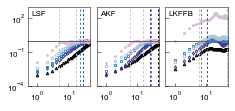

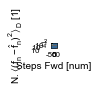

In [2]:
lnstyl = ['^', 'd', 's', 'o', '*']  # By regime 
color_gradient = ['k', 'darkslateblue', 'steelblue', 'lightsteelblue', 'thistle']*10 + ['k'] # ['darkblue', 'darkslateblue', 'steelblue', 'lightsteelblue', 'thistle']
marker_gradient = lnstyl*2 + [''] 

case_ratios = [0.2, 0.4, 0.6, 0.8 , 2.0]

gs = gridspec.GridSpec(1, 3,
                       left=0.15, right=0.97, 
                       top=0.85, bottom=0.15, 
                       wspace=0.1, hspace=0.2)

fig = plt.figure(figsize=(cm2inch(8.6),cm2inch(4)))



def maxpredictionhorizon(ax, ax_format):
    
    idx_color = 0
    for item in ax.lines[::2]:
        
        try:
            max_x_horizon = next(fx[0] for fx in enumerate(item.get_ydata()) if fx[1] > 0.79) 
            vlineat =  item.get_xdata()[max_x_horizon -1]
        except StopIteration:
            max_x_horizon=item.get_xdata()[-1]
            vlineat =  item.get_xdata()[max_x_horizon -1]
    
        ax.axvline(x=vlineat, c= ax_format[idx_color], lw=algorithm_lw, linestyle=':')
        print idx_color, vlineat
        idx_color +=1
    
    return ax
 
# Plot results for tuned LSF, AKF, LKFFB 

algo_list = ['LSF', 'AKF', 'LKFFB']
idx_algo =0 
test_case=24
variation_scan=[1, 2, 3, 4, 7]
datapath2 = '../../../../DATA_v'+str(ver)+'_/'#temp_3- QIF_BR_MAP_tuned_sigma_v2/'
dumpfig = plt.figure(figsize=(0.1, 0.1))
dumpax = dumpfig.add_subplot(111)

for idx_algo in xrange(len(algo_list)):

    vars()['ax_'+str(idx_algo)] = fig.add_subplot(gs[0, idx_algo])

    for idx_c in xrange(len(variation_scan)):

        fig_data_name = figdata+figname+'_tc_'+str(test_case)+'_v_'+str(variation_scan[idx_c])

 
        dumpax, vars()['ax_'+str(idx_algo)]  = pnm(dumpax, vars()['ax_'+str(idx_algo)] ,  [algo_list[idx_algo]], 
                           test_case, variation_scan[idx_c], 
                           datapath2,
                           fstep=50, sstep=50, lowloss=20, save_data='Yes', # saving (save_data=0 will skip save)
                           ylim = [-4, 3], yscale='log')
        
        idx_cases=0
        for item in vars()['ax_'+str(idx_algo)].lines[::2]:

            # formatting
            item.set_color(color_gradient[idx_cases])
            item.set_marker(marker_gradient[idx_cases])
            item.set_markeredgecolor(color_gradient[idx_cases])
            item.set_markerfacecolor("None")
            item.set_linestyle('')
            idx_cases +=1
   
    # Plot vline when Bayes pred risk > 0.9
    vars()['ax_'+str(idx_algo)] = maxpredictionhorizon(vars()['ax_'+str(idx_algo)], color_gradient[0:5])
    
    vars()['ax_'+str(idx_algo)].margins(0.2)
    vars()['ax_'+str(idx_algo)].set(xlabel='', ylabel='')
    vars()['ax_'+str(idx_algo)].set_yscale('log')
    vars()['ax_'+str(idx_algo)].set_xscale('log')
    vars()['ax_'+str(idx_algo)].axhline(1.0,  color=COLOURDICT['DATA'], lw=prediczero_lw, alpha=1.0)
    # vars()['ax_'+str(idx_algo)].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    # vars()['ax_'+str(idx_algo)].yaxis.set_minor_formatter(FormatStrFormatter('%.0f'))   
    vars()['ax_'+str(idx_algo)].tick_params(direction='in', which='both')
    vars()['ax_'+str(idx_algo)] = set_font_sizes(vars()['ax_'+str(idx_algo)], fsize, Fsize)
    vars()['ax_'+str(idx_algo)].yaxis.set_major_locator(ticker.LogLocator(base=10, numticks=2))
    vars()['ax_'+str(idx_algo)].set_ylim([10**-4, 1000])
    vars()['ax_'+str(idx_algo)].set_xlim([0.5, 52])
    vars()['ax_'+str(idx_algo)].text(0.05, 0.88, algo_list[idx_algo],
                                     horizontalalignment='left', verticalalignment='bottom', 
                                     transform=vars()['ax_'+str(idx_algo)].transAxes)
    vars()['ax_'+str(idx_algo)].minorticks_off()

ax_1.set_yticklabels('')
ax_2.set_yticklabels('')

fig.savefig(savefig+figname+'.svg', format='svg', dpi=my_dpi)
plt.show()